# Задача 1: сравнение предложений


Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

кошки (животные)
UNIX-утилита cat для вывода содержимого файлов
версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

In [434]:
import pandas as pd
import numpy as np
import scipy.spatial.distance as sp
import matplotlib as mt

шаг 1. 
Качаем  файл с предложениями. Каждая строка в файле соответствует одному предложению.
Считаем их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [435]:
import requests

In [439]:
sentences=requests.get('https://d3c33hcgiwev3.cloudfront.net/_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt?Expires=1561075200&Signature=PGpGsHpGPNnTPvzOiZm5af8q8K6QZJxBKKECDUk3upEypg1aMFOuy4jEGt9a1Xl6XZI4r1WaiT1wujgtiMYvRVEW7aCRjKs48qLxX3om42GT2ydwsvSfDN8vFa80xVVneKOhL57rZmR45hEtkUp-e3O-IMQc93pCPz15i1SeVX0_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A')

In [440]:
a=sentences.text.lower()
row=a.split('.\n') # (т.к. все протабулирвоаны/ последняя пустая после точки)
del row[-1]


"""
или
t=open('cat.txt')
s=t.read().lower()
"""

"\nили\nt=open('cat.txt')\ns=t.read().lower()\n"

In [459]:
#print(a)

Шаг 2. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [442]:
import re

In [443]:
itog=[re.split('[^a-z]', i) for i in row] 
# сделал список предложений со списками  слов. в данном списке далее будем искать нужыне слова

In [444]:
b=re.split('[^a-z]',a)  # сделал список из слов, рег. выражение считает раздяет по всем символа кроме букв, заменя их на
                        #пустые строки

In [445]:
b=list(filter(None, b)) # filtr - иттератор. принимает список и удалаеи пустые строки 


Шаг 3.Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [446]:
d=set(b)

In [447]:
e=dict(zip(range(len(d)), d )) # или через нумерацию списка { i: z for i, z in enumerate (d)}
#e

Шаг 4. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [448]:
matr=np.array([[0]*len(e) for i in range(len(itog))]) # создаем матрицу нужного рамзера
# второй способ 
# matr=np.ones((len(row), col))

In [458]:
#e

In [450]:
for i in range(len(itog)):
    for j in range(len(e)):
        matr[i][j]=itog[i].count(e[j]) # в каждой ячейке считываем для строки i число входждения слова из словарая по ключу

In [451]:
matr.shape

(22, 254)

In [452]:
matr[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Шаг 5.Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [453]:
result={}

In [454]:
for i in range(len(row)):
    result.update ({i:(sp.cosine(matr[0],matr[i]))}) # добавляем в словарь косинусное расстояние

In [455]:
result

{0: 0.0,
 1: 0.9527544408738466,
 2: 0.8644738145642124,
 3: 0.8951715163278082,
 4: 0.7770887149698589,
 5: 0.9402385695332803,
 6: 0.7327387580875756,
 7: 0.9258750683338899,
 8: 0.8842724875284311,
 9: 0.9055088817476932,
 10: 0.8328165362273942,
 11: 0.8804771390665607,
 12: 0.8396432548525454,
 13: 0.8703592552895671,
 14: 0.8740118423302576,
 15: 0.9442721787424647,
 16: 0.8406361854220809,
 17: 0.956644501523794,
 18: 0.9442721787424647,
 19: 0.8885443574849294,
 20: 0.8427572744917122,
 21: 0.8250364469440588}

In [456]:
for i in sorted(result, key=result.get, reverse=False): # используем sorted для сортировки значений 
  print (i, result[i])

0 0.0
6 0.7327387580875756
4 0.7770887149698589
21 0.8250364469440588
10 0.8328165362273942
12 0.8396432548525454
16 0.8406361854220809
20 0.8427572744917122
2 0.8644738145642124
13 0.8703592552895671
14 0.8740118423302576
11 0.8804771390665607
8 0.8842724875284311
19 0.8885443574849294
3 0.8951715163278082
9 0.9055088817476932
7 0.9258750683338899
5 0.9402385695332803
15 0.9442721787424647
18 0.9442721787424647
1 0.9527544408738466
17 0.956644501523794


In [457]:
t=open('cat_out.txt', 'w')

In [31]:
n='6'+' '+ '4'

In [165]:
t.write(n)

3

In [166]:
t.close()

# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

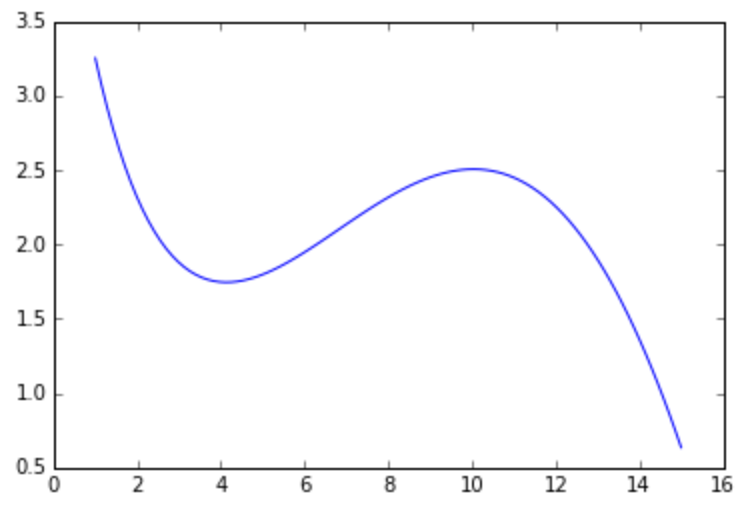

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

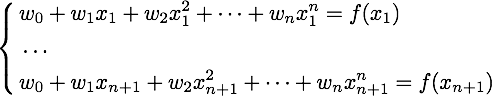

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Шаг 1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [406]:
from scipy import linalg
import matplotlib.pyplot as plt

In [407]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)


w0 + w1x -  многочлен первой степени. значит в матрицу попадает 1 перед w0 и x перед w1/ для многочлена второй степери все то же самое + x**2


строим систему уравнений для 2 многочленов.
w0 + 1 * w1 = 3.25
w0 + 15 * w1 = 0.63
далее находим решение и строим график прямой y=w1x + wo

In [408]:
matrix=np.array([[1, 1], [1, 15]]) #матрица w_0/w_1  2-х многочленов первой степени

In [409]:
b=np.array([(round(f(1), 2)),(round(f(15), 2))]) # вектор 

In [410]:
b

array([3.25, 0.64])

In [411]:
solve1=linalg.solve(matrix,b) # находим новый вектор 

In [412]:
def solution(x):
    return solve1[1]*x + solve1[0]
#функция возвращаеи уровнение прямой kx + b  (многочлен первой степени) из найденного ранее вектора solve1

In [413]:
solution(1)

3.25

In [414]:
t1 = np.arange(1, 15, 0.1) # cоздадим массив данных для построения заданного графика 

In [415]:
t2= np.array([1,15]) # создадим массив из двух абцисс, которые принимает график

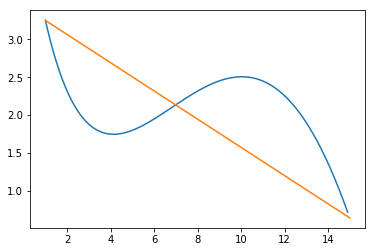

In [416]:
plt.plot(t1,f(t1))
plt.plot(t2, solution(t2))


Шаг 2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


многочлен второй степени имеет вид w0 + w1x + w2x**2 / значит имеем систему из трех многочленов

In [417]:
matrix=np.array([[1, 1, 1], [1, 8, 64],[1,15,15**2]])

In [418]:
b=np.array([(round(f(1), 2)),(round(f(8), 2)),(round(f(15), 2))]) 

In [419]:
solve2=linalg.solve(matrix,b)

In [420]:
def solution2(x):
    return solve2[2]*x**2 + solve2[1]*x + solve2[0]

In [421]:
t2= np.array([1,8,15])

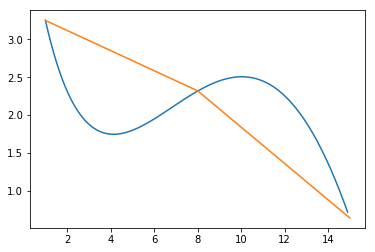

In [422]:
plt.plot(t1,f(t1))
plt.plot(t2, solution2(t2))


Шаг 3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

многочлен третьей степени имеет вид w0 + w1x + w2x**2 + w3x**3 / значит имеем систему из 4-x многочленов

In [423]:
matrix=np.array([[1, 1, 1, 1], [1, 4, 16, 64],[1,10,100,1000],[1,15,15**2, 15**3]])

In [424]:
b=np.array([(round(f(1), 2)),(round(f(4), 2)),(round(f(10), 2)),(round(f(15), 2))]) 

In [425]:
solve3=linalg.solve(matrix,b)

In [426]:
def solution3(x):
    return solve3[3]*x**3 + solve3[2]*x**2 + solve3[1]*x + solve3[0]

In [427]:
t2= np.array([1,4,10,15])

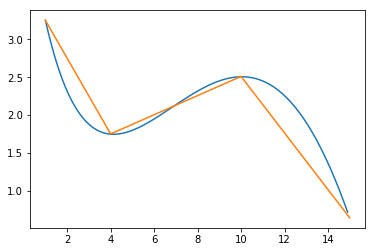

In [428]:
plt.plot(t1,f(t1))
plt.plot(t2, solution3(t2))

In [429]:
submission=open('submission.txt', 'w')

In [430]:
k=[]
for i in range(len(solve3)):
    k.append(round(solve3[i],2))

In [431]:
itog=' '.join(str(x) for x in k)

In [432]:
submission.write(itog)

21

In [433]:
submission.close()